#### Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

<div class="alert alert-block alert-info">
<b><font size="4"> Importing the Necessary Libraries</font></b>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('default')
# import pandas_profiling as pp # pip3 install pandas-profiling
# from IPython.core.display import display,HTML
# display(HTML("<style>.container{width:100% !important;}</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-info">
<b><font size="4"> Data Acquisition & Exploration</font></b>
</div>

In [709]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


<div class="alert alert-block alert-info">
<b><font size="4"> Filling missing values across the dataset</font></b>
</div>

In [711]:
from numpy import random as rn
def rand():
    p = 0.015
    data =rn.random(len(df))
    return list(map(lambda x: x < p, data))
df.loc[rand(), 'date'] = None
df.loc[rand(), 'waterfront'] = None
df.loc[rand(), 'yr_built'] = None
df.loc[rand(), 'yr_renovated'] = None
df.loc[rand(), 'bathrooms'] = None

In [712]:
df.shape

(21613, 21)

In [714]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# profile

###### The above code upon reopening may not display the output report, as we need to rerun the code again as it is expect behaviour

In [715]:
# profile.to_file(output_file="datanalysis.html")# saving the profile report

<div class="alert alert-block alert-info">
<b><font size="4"> Exploratory Data Analysis</font></b>
</div>

In [8]:
#identifying insignificant Features
def coefpval(x,y):
    x=x[x.corr().columns]
    from scipy import stats
    ls=[]
    for i in range(x.shape[1]):
        ls.append(stats.pearsonr(x.iloc[:,i], y)  )
    copv=pd.DataFrame(ls,index=x.columns,columns= ['Pearson-Coeff','P-Value'])
    copv['P-Ind'] = pd.cut(copv['P-Value'], bins =[0, 0.001, 0.05,0.1, 1.0], labels=['Strong','Moderate','Weak','Insignificant'], include_lowest=True )
    copv['C-Ind'] = pd.cut(copv['Pearson-Coeff'], bins =[-1.0,0, 1.0], labels=['Negative','Positive'], include_lowest=True )
    
    return copv

# Function of multi-Correlation
def multicorrelation(data, threshold=0.80):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = data.corr()
    
    print('  \n    Correlation with more than :',threshold)
    print('\n\nCorr Value',"\t",'Fearture1', "\t\t\t\t", 'Feature 2')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(f'{corr_matrix.iloc[i, j].round(5):<{16}} {corr_matrix.columns[i]:{39}} {corr_matrix.columns[j]:{40}}')
                     
    print('\n\n The above mentioned correlations only are present in the given Dataset')

In [9]:
x = df.dropna().drop('price',axis=1)
y = df.dropna()['price']

In [10]:
display(coefpval(x,y))

,Pearson-Coeff,P-Value,P-Ind,C-Ind
id,-0.019341,6.156249e-03,Moderate,Negative
bedrooms,0.305980,0.000000e+00,Strong,Positive
bathrooms,0.525960,0.000000e+00,Strong,Positive
sqft_living,0.702280,0.000000e+00,Strong,Positive
sqft_lot,0.093982,1.372732e-40,Strong,Positive
floors,0.256651,3.870016e-299,Strong,Positive
waterfront,0.270203,0.000000e+00,Strong,Positive
view,0.398886,0.000000e+00,Strong,Positive
condition,0.036705,1.994135e-07,Strong,Positive
grade,0.668080,0.000000e+00,Strong,Positive


From the above results we can see that only `id` are moderate relationship with the Target variable `price`

In [11]:
multicorrelation(df,threshold=0.5)

  
    Correlation with more than : 0.5


Corr Value 	 Fearture1 				 Feature 2
0.52592          bathrooms                               price                                   
0.51559          bathrooms                               bedrooms                                
0.70204          sqft_living                             price                                   
0.57667          sqft_living                             bedrooms                                
0.75501          sqft_living                             bathrooms                               
0.50213          floors                                  bathrooms                               
0.66743          grade                                   price                                   
0.66493          grade                                   bathrooms                               
0.7627           grade                                   sqft_living                             
0.60557          sqft_above           

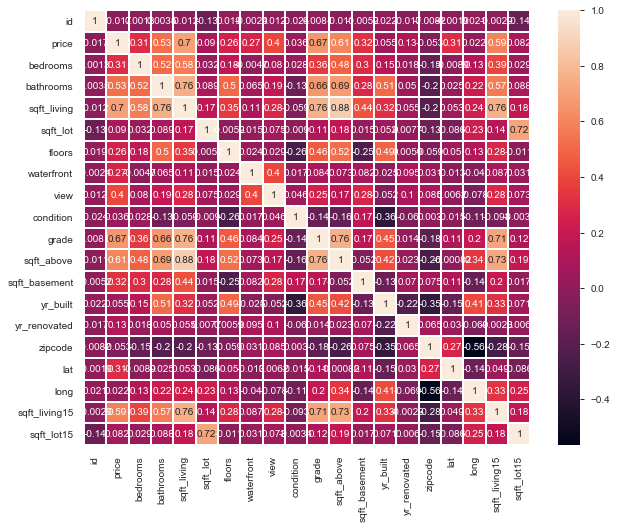

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linecolor='white',linewidths=1,annot=True)

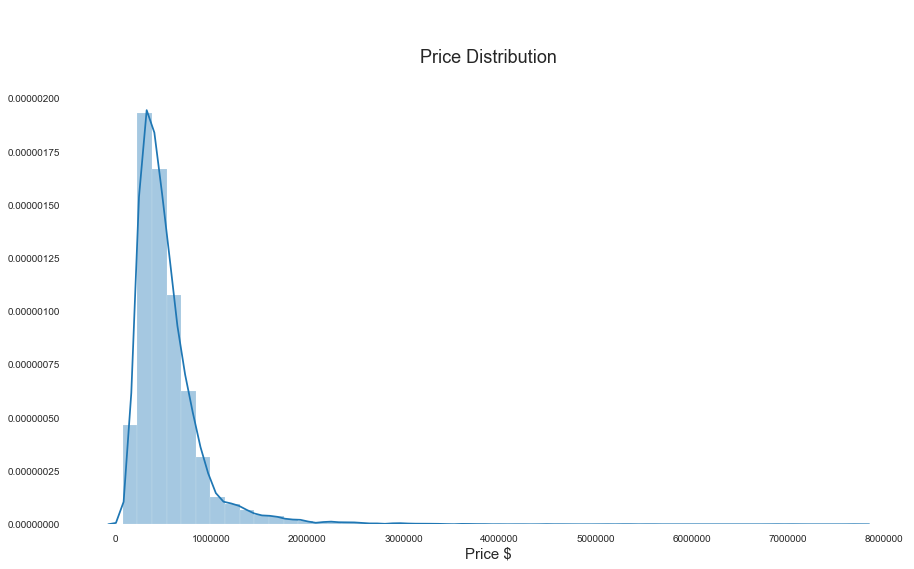

In [13]:
plt.figure(figsize=(15,8))
sns.distplot(df['price'])
plt.xlabel('Price $',fontsize=15)
plt.title('\n\nPrice Distribution\n',fontsize=18)
plt.show()

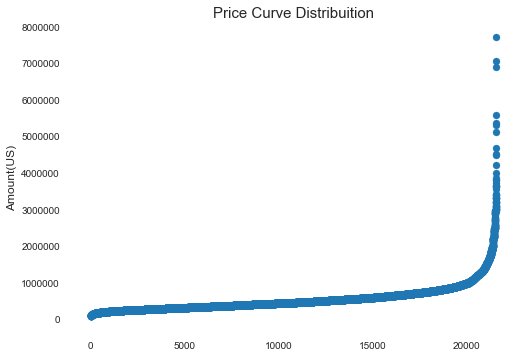

In [14]:
plt.scatter(range(df.shape[0]), np.sort(df.price.values))
plt.title("Price Curve Distribuition", fontsize=15)
plt.xlabel("")
plt.ylabel("Amount(US)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4"> Data Pre-Processing</font></b>
<div>

In [15]:
pd.concat([df.isnull().sum().sort_values(ascending = False),((df.isnull().sum() / len(df))*100).sort_values(ascending = False)],axis = 1,keys = ['Total','Percent %'])

,Total,Percent %
yr_built,331,1.531486
bathrooms,331,1.531486
date,322,1.489844
waterfront,313,1.448202
yr_renovated,298,1.378800
sqft_lot15,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000


In [16]:
# drop id and date columns
df.drop(['id', 'date'],axis=1, inplace=True)

#filling the NaN values with 0 for 'yr_renovated', 'yr_built', and waterfront features
df['yr_renovated'].fillna(0,inplace=True)
df['yr_built'].fillna(0,inplace=True)
df['waterfront'].fillna(0,inplace=True)

In [17]:
df[['bedrooms','bathrooms']].groupby('bedrooms').mean().sort_values('bathrooms',ascending=False)

,bathrooms
bedrooms,
9,4.416667
7,3.628378
8,3.557692
10,3.416667
6,3.066667
11,3.000000
5,2.778699
4,2.437158
3,1.967527


In [18]:
#grouby by baedrooms and replace with mean for bathrooms missing values
bedrooms_grouped = df.groupby(["bedrooms"])
bedrooms_imputed = bedrooms_grouped.transform(lambda grp: grp.fillna(grp.mean()))
bedrooms_imputed

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,1.00,1180,5650,1.0,0.0,0,3,7,1180,0,1955.0,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,2.25,2570,7242,2.0,0.0,0,3,7,2170,400,1951.0,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,1.00,770,10000,1.0,0.0,0,3,6,770,0,1933.0,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,3.00,1960,5000,1.0,0.0,0,5,7,1050,910,1965.0,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,2.00,1680,8080,1.0,0.0,0,3,8,1680,0,1987.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,2.50,1530,1131,3.0,0.0,0,3,8,1530,0,2009.0,0.0,98103,47.6993,-122.346,1530,1509
21609,400000.0,2.50,2310,5813,2.0,0.0,0,3,8,2310,0,2014.0,0.0,98146,47.5107,-122.362,1830,7200
21610,402101.0,0.75,1020,1350,2.0,0.0,0,3,7,1020,0,2009.0,0.0,98144,47.5944,-122.299,1020,2007
21611,400000.0,2.50,1600,2388,2.0,0.0,0,3,8,1600,0,2004.0,0.0,98027,47.5345,-122.069,1410,1287


In [19]:
bedrooms_imputed['bathrooms'].isnull().sum()

0

In [20]:
df['bathrooms'] = bedrooms_imputed['bathrooms']

<div class="alert alert-block alert-warning">
                                                                                       
We will lose the rest of the features just because one of the features had a missing value even if it’s a small percentage of the dataset. Instead of dropping one whole observation, we will keep the data. 
    
    
From above we can see that the `yr_renovated`, `yr_built` and `waterfront` are missing only about 0.015% of the data, hence we will be replacing null values in the column with '0' in the dataset as its logic to conclude that if it's null then it's possibly there's no yr_renovated, yr_built or waterfront data. 

We also replace `bathrooms` with mean grouping by the `bedrooms` as more bedrooms indicates more bathrooms and it's beneficial for simple linear models. 
<br>
    
And we will also be dropping the features `id` and `date as they won't be quite useful for Regression analysis. Hence we will be dropping these features while modelling but for Exploratiry Data Analysis(EDA), we will make use of it to understand the dataset better.
<div>

In [21]:
# Checking the shape of the dataset after dropping the NaN values
df.shape

(21613, 19)

In [22]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now, all the NaN values are removed from the Dataframe

<div class="alert alert-block alert-info">
<b><font size="4"> Data Partitioning :</font></b>
    
Machine learning methods typically require splitting data into multiple chunks for training, validating, and finally testing for building and training a model
    <div>

In [23]:
X=df.drop(['price'],axis=1)
y=df['price']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [26]:
print(X_train_org.shape, y_train.shape)

(15129, 18) (15129,)


In [27]:
print(X_test_org.shape, y_test.shape)

(6484, 18) (6484,)


<div class="alert alert-block alert-info">
<b><font size="4"> Feature Scaling</font></b>
<div>

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

<div class="alert alert-block alert-info">
<b><font size="4"> Model Evaluation strategy (Metrics Selection)</font></b>

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

<div class="alert alert-block alert-info">
<b><font size="4">  KNN Regressor</font></b>

In [375]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsRegressor
knnparameters = {'n_neighbors':range(3,12)}
reg = GridSearchCV(KNeighborsRegressor(), knnparameters,return_train_score=True, cv= 6, n_jobs=-1)
reg.fit(X_train, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(3, 12)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [378]:
reg.score(X_test, y_test)
#R2 score

0.7785134386477723

In [379]:
print(f'Best parameters: {reg.best_params_}')
print(f'Best cross-validation score: {reg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.7803305044564227


In [380]:
results=pd.DataFrame(reg.cv_results_)
results.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.077448,0.007720,1.765343,0.352252,3,{'n_neighbors': 3},0.772603,0.702183,0.777526,0.753921,...,0.028143,9,0.881010,0.883287,0.874322,0.880920,0.881000,0.877522,0.879677,0.002928
1,0.078681,0.006864,1.899310,0.356572,4,{'n_neighbors': 4},0.770976,0.723733,0.795320,0.754698,...,0.026444,8,0.864906,0.867119,0.858985,0.861453,0.868700,0.865367,0.864422,0.003293
2,0.086814,0.020335,1.492022,0.051501,5,{'n_neighbors': 5},0.780121,0.738546,0.803796,0.755171,...,0.023658,4,0.854915,0.858849,0.848714,0.850793,0.854932,0.858031,0.854372,0.003625
3,0.076571,0.002691,1.519748,0.043124,6,{'n_neighbors': 6},0.779014,0.736719,0.801506,0.758538,...,0.023446,2,0.845942,0.850875,0.839791,0.844015,0.843940,0.848109,0.845445,0.003491
4,0.076277,0.004990,1.600950,0.091392,7,{'n_neighbors': 7},0.780933,0.732894,0.803518,0.762411,...,0.026052,1,0.838973,0.844161,0.832775,0.836804,0.833503,0.839283,0.837583,0.003840
5,0.077573,0.007830,1.603179,0.042278,8,{'n_neighbors': 8},0.774641,0.732107,0.802499,0.761297,...,0.025606,3,0.833304,0.837151,0.826368,0.830714,0.827404,0.831644,0.831098,0.003605


In [381]:
pred = reg.predict(X_test)
print('\nFor n_neighbors=',results['params'][reg.best_index_])
print('\n\t• Cross validation Training score mean: ',results['mean_train_score'][reg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,reg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For n_neighbors= {'n_neighbors': 7}

	• Cross validation Training score mean:  0.8375834338503795

	• Cross validation Testing score mean:  0.7803305044564227

	• R2 Score:  0.7785134386477723

	• Root Mean Squared Error:  174379.8218526382
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">     

    
From the above results we can see that the KNN model yields the best results when `K = 7` which leads to the best R<sup>2</sup> score of `0.778513`
<div>

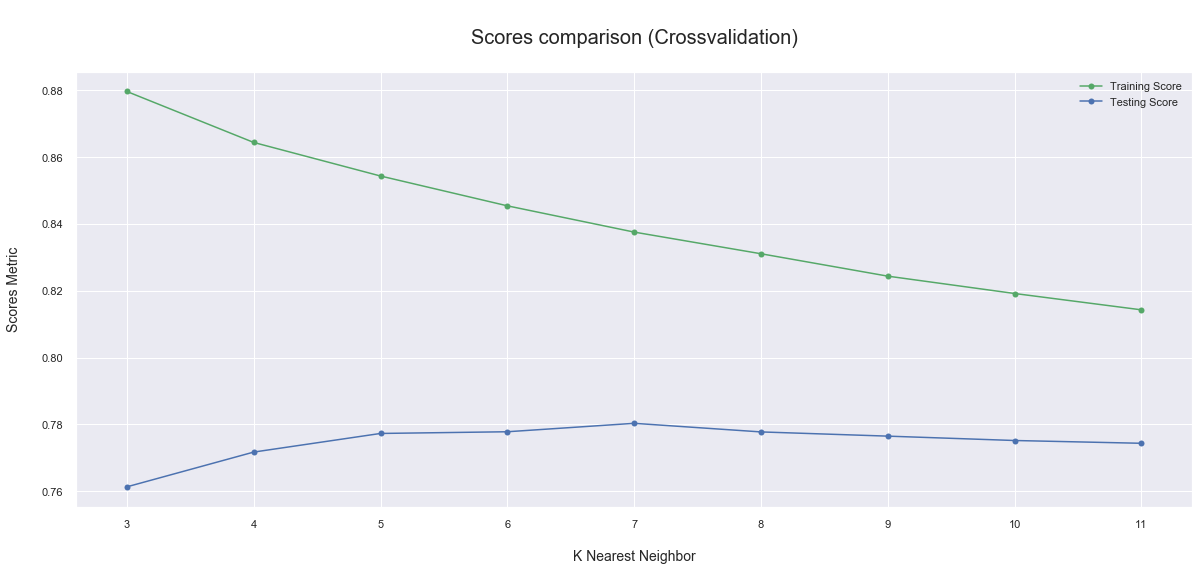

In [383]:
plt.figure(figsize=(20,8))
x_axis = list(range(3,12))
plt.plot(x_axis, results['mean_train_score'], c = 'g', label = 'Training Score',marker='o')
plt.plot(x_axis, results['mean_test_score'], c = 'b', label = 'Testing Score',marker='o')
plt.legend(loc='best')
plt.title('\nScores comparison (Crossvalidation)\n',fontsize=20)
plt.xlabel('\nK Nearest Neighbor',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
sns.set()
plt.show()

Lets analyze the Crossvalidation testing score closely as we have to choose the best score

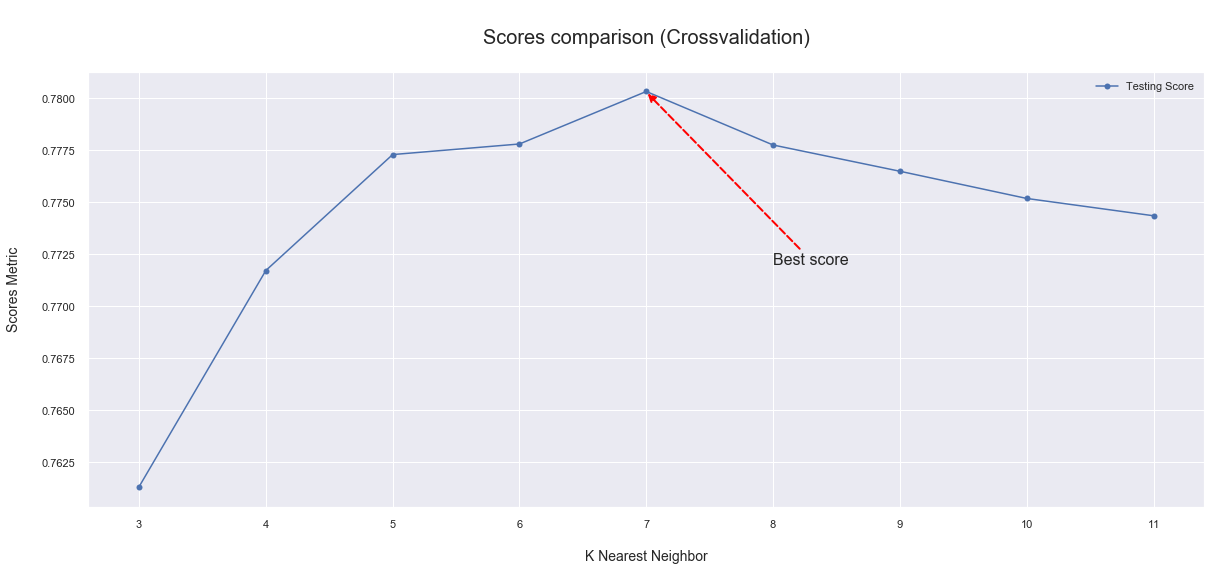

In [384]:
plt.figure(figsize=(20,8))
x_axis = list(range(3,12))
plt.plot(x_axis, results['mean_test_score'], c = 'b', label = 'Testing Score',marker='o')
plt.annotate("Best score",fontsize=16,xy=(7, 0.7803),xytext=(8, 0.7720), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.legend(loc='best')
plt.title('\nScores comparison (Crossvalidation)\n',fontsize=20)
plt.xlabel('\nK Nearest Neighbor',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
plt.show()

<div class="alert alert-block alert-warning">
Let's Visualize the plot of the best fit line by the KNN model below for a sample of data with only one x variable and y variable for simplicity:
    <div>

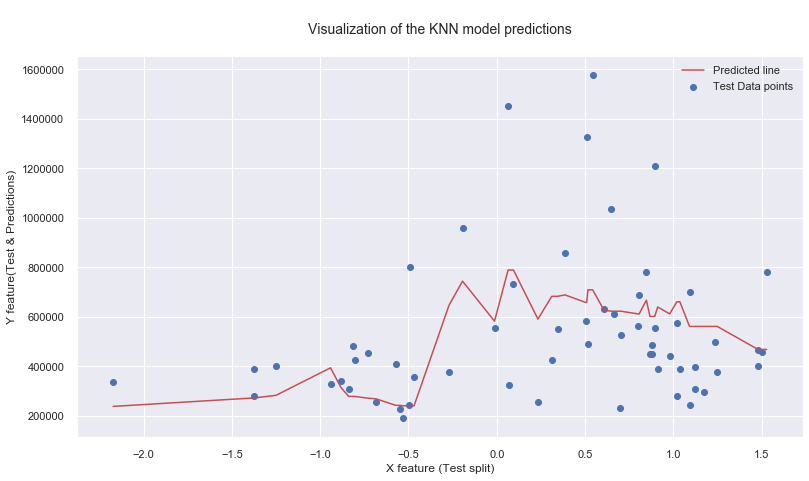

In [597]:
from sklearn.neighbors import KNeighborsRegressor
X_b = X_train[:60,14].reshape(-1,1)
y_b = y_train[:60]
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict = knn_reg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the KNN model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">  Linear Regression</font></b>

In [386]:
np.random.seed(42)
from sklearn.linear_model import LinearRegression
lnreg=LinearRegression()
lnreg.fit(X_train, y_train)
print(f'\n\nLinear Regression Model and the metrics :\n')
print('\t• Training score of the Linear Regression Model is :',lnreg.score(X_train, y_train))
print('\n\t• Testing score of the Linear Regression Model is :',lnreg.score(X_test, y_test))
pred= lnreg.predict(X_test)
print(f'\n\t• Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))} \n\n\t• R2 Score: {r2_score(y_test,pred)}')



"Linear Regression Model and the metrics" :

	• Training score of the Linear Regression Model is : 0.6862569009065136

	• Testing score of the Linear Regression Model is : 0.6693799446228004

	• Root Mean Squared Error: 213052.7461756424 

	• R2 Score: 0.6693799446228004


<div class="alert alert-block alert-success">     

    
From the above results we can see that the simple linear model yields 
    R<sup>2</sup> score of `0.669379`. The test score is relatively close to the training score.
<div>

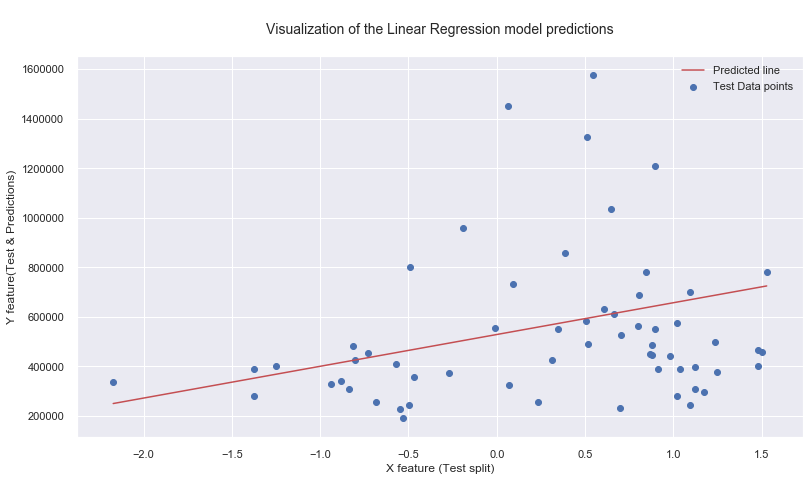

In [596]:
X_b = X_train[:60,14].reshape(-1,1)
y_b = y_train[:60]
lnreg=LinearRegression()
lnreg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict = lnreg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the Linear Regression model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">  Ridge Regression</font></b>

In [388]:
from sklearn.linear_model import Ridge

In [389]:
np.random.seed(42)
parameters = {'alpha': [0.01,0.1,1,20,35,50,70,100,105,110,115,120]}
ridge_reg = GridSearchCV(Ridge(random_state=0), parameters,return_train_score=True, cv=6, n_jobs=-1)
ridge_reg.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=0,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 20, 35, 50, 70, 100, 105, 110,
                                   115, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [390]:
ridge_reg.score(X_test, y_test)
#R2 score

0.6690720986678249

In [391]:
print(f'Best parameters: {ridge_reg.best_params_}')
print(f'Best cross-validation score: {ridge_reg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'alpha': 120}
Best cross-validation score: 0.6818547855881295


In [392]:
result=pd.DataFrame(ridge_reg.cv_results_)
result.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
7,0.005760,0.001445,0.001265,0.000445,100,{'alpha': 100},0.680354,0.631906,0.688713,0.684680,...,0.023941,5,0.687031,0.693888,0.685469,0.686292,0.683410,0.682807,0.686483,0.003632
8,0.005565,0.001824,0.001148,0.000118,105,{'alpha': 105},0.680328,0.631942,0.688713,0.684664,...,0.023931,4,0.687029,0.693885,0.685466,0.686290,0.683408,0.682804,0.686480,0.003632
9,0.005065,0.001103,0.003055,0.002119,110,{'alpha': 110},0.680302,0.631978,0.688712,0.684648,...,0.023921,3,0.687026,0.693882,0.685464,0.686287,0.683405,0.682802,0.686478,0.003632
10,0.007562,0.000532,0.002197,0.002276,115,{'alpha': 115},0.680276,0.632013,0.688712,0.684632,...,0.023911,2,0.687024,0.693880,0.685461,0.686284,0.683402,0.682799,0.686475,0.003632
11,0.008497,0.003069,0.002378,0.003123,120,{'alpha': 120},0.680250,0.632049,0.688711,0.684616,...,0.023902,1,0.687021,0.693877,0.685458,0.686281,0.683399,0.682796,0.686472,0.003632


In [393]:
pred = ridge_reg.predict(X_test)
print('\nFor alpha =',result['param_alpha'][ridge_reg.best_index_])
print('\n\t• Cross validation Training score mean: ',result['mean_train_score'][ridge_reg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,ridge_reg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For alpha = 120

	• Cross validation Training score mean:  0.6864721154458823

	• Cross validation Testing score mean:  0.6818547855881295

	• R2 Score:  0.6690720986678249

	• Root Mean Squared Error:  213151.91161456838
----------------------------------------------------------------------------


<div class="alert alert-block alert-danger">     

From the above results we can see that the Ridge model yields the best results when `alpha =120` which leads to the best R<sup>2</sup> score of `0.669072` and it's worse than simple linear regression. As alpha become larger, the r2 score is getting near to the result of simple linear regression. In addition, the test score is relatively close to the training score, which indicates that there's no need to regularize the model.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  LASSO Regression </font></b>

In [394]:
from sklearn.linear_model import Lasso

In [395]:
np.random.seed(42)
params = {'alpha': [0.001,0.01,0.1, 1, 20, 40, 60, 75 ,80, 85, 90, 100, 120]}
lasso_reg = GridSearchCV(Lasso(random_state=0), params,return_train_score=True, cv=6, n_jobs=-1)
lasso_reg.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 20, 40, 60, 75, 80, 85,
                                   90, 100, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [396]:
lasso_reg.score(X_test, y_test)
#R2 score

0.6693526658985445

In [397]:
print(f'Best parameters: {lasso_reg.best_params_}')
print(f'Best cross-validation score: {lasso_reg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'alpha': 80}
Best cross-validation score: 0.6817933726959152


In [208]:
result1=pd.DataFrame(lasso_reg.cv_results_)
result1.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
8,0.399241,0.025061,0.001589,0.000231,80,{'alpha': 80},0.680840,0.631251,0.688679,0.684936,...,0.024120,1,0.687053,0.693911,0.685493,0.686316,0.683435,0.682830,0.686506,0.003632
9,0.402348,0.026582,0.001658,0.000257,85,{'alpha': 85},0.680786,0.631273,0.688678,0.684933,...,0.024113,6,0.687053,0.693911,0.685493,0.686316,0.683435,0.682830,0.686506,0.003632
10,0.343400,0.038499,0.001649,0.000190,90,{'alpha': 90},0.680782,0.631280,0.688677,0.684931,...,0.024111,5,0.687053,0.693911,0.685492,0.686316,0.683435,0.682829,0.686506,0.003632
11,0.341998,0.032209,0.001463,0.000095,100,{'alpha': 100},0.680772,0.631295,0.688675,0.684926,...,0.024108,3,0.687052,0.693910,0.685492,0.686315,0.683435,0.682829,0.686506,0.003632
12,0.253609,0.039109,0.001587,0.000757,120,{'alpha': 120},0.680754,0.631324,0.688671,0.684915,...,0.024100,2,0.687051,0.693909,0.685491,0.686314,0.683434,0.682828,0.686505,0.003632


In [398]:
preds = lasso_reg.predict(X_test)
print('\nFor alpha =',result1['param_alpha'][lasso_reg.best_index_])
print('\n\t• Cross validation Training score mean: ',result1['mean_train_score'][lasso_reg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,lasso_reg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,preds))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, preds)))
print('----------------------------------------------------------------------------')


For alpha = 80

	• Cross validation Training score mean:  0.6865062659506282

	• Cross validation Testing score mean:  0.6817933726959152

	• R2 Score:  0.6693526658985445

	• Root Mean Squared Error:  213061.53524809203
----------------------------------------------------------------------------


<div class="alert alert-block alert-danger">     

From the above results we can see that the Lasso model yields the best results when `alpha = 80` which leads to the best R<sup>2</sup> score of `0.669352` and it's about the same as simple linear regression. 
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  Polynomial Regression   </font></b>

In [559]:
from sklearn.preprocessing import PolynomialFeatures

In [569]:
np.random.seed(42)
train_score_list = []
test_score_list = []

for n in range(1,4): 
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    print('\nFor degree =', n)
    lnreg.fit(X_train_poly,y_train)
    y_pred=lnreg.predict(X_test_poly)
    train_score_list.append(lnreg.score(X_train_poly,y_train))
    test_score_list.append(lnreg.score(X_test_poly, y_test))
    print('\n\t• Training score: ',train_score_list[-1])
    print('\n\t• Testing score: ',test_score_list[-1])
    print(f'\n\t• Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))} \n\n\t• R2 Score: {r2_score(y_test,y_pred)}')
    print('----------------------------------------------------------------------------')


For degree = 1

	• Training score:  0.6862221432528335

	• Testing score:  0.669329084172744

	• Root Mean Squared Error: 213069.1328734223 

	• R2 Score: 0.669329084172744
----------------------------------------------------------------------------

For degree = 2

	• Training score:  0.8211326089514348

	• Testing score:  0.812826115592471

	• Root Mean Squared Error: 160304.29777688178 

	• R2 Score: 0.812826115592471
----------------------------------------------------------------------------

For degree = 3

	• Training score:  0.8994938952479923

	• Testing score:  -3.712512251266309e+16

	• Root Mean Squared Error: 71393140598495.72 

	• R2 Score: -3.712512251266309e+16
----------------------------------------------------------------------------


<div class="alert alert-block alert-danger">

From the above results we can see that the Polynomial Regression model yields the best results when `degree=2`which leads to the best R<sup>2</sup> score of `0.812826` which is the maximum score of all the models we  build. 
<div>

<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Polynomial Model 

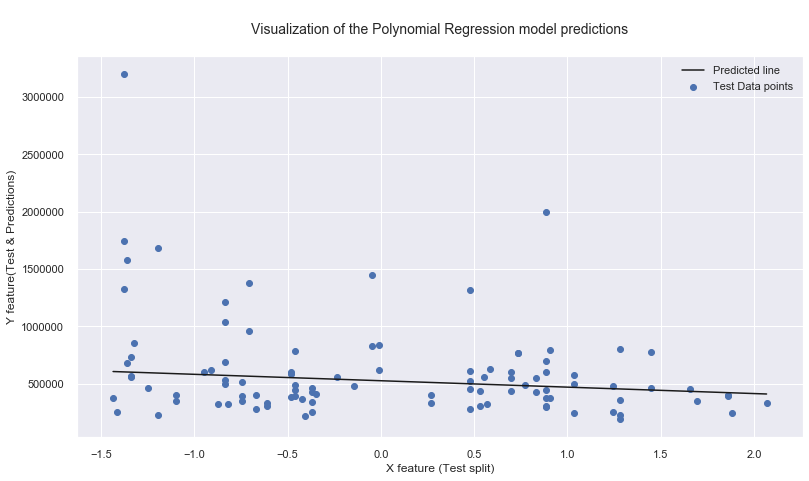

In [599]:
X_b = X_train_poly[:100,14].reshape(-1,1)
y_b = y_train[:100]
lnreg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_poly[:100,14].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = lnreg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'k',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the Polynomial Regression model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">  Linear Support Vector Regressor </font></b>

In [399]:
from sklearn.svm import LinearSVR

In [527]:
np.random.seed(42)
params_C = {'C': [0.01,0.1,1,10,100,1000,8450,9000]}
svreg = GridSearchCV(LinearSVR(random_state=0), params_C,return_train_score=True, cv=6, n_jobs=-1)
svreg.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=0, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 8450, 9000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [528]:
svreg.score(X_test, y_test)
#R2 score

0.6168500211191095

In [529]:
print(f'Best parameters: {svreg.best_params_}')
print(f'Best cross-validation score: {svreg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 8450}
Best cross-validation score: 0.6398207846569269


In [533]:
result3=pd.DataFrame(svreg.cv_results_)
result3.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
3,0.016962,0.008365,0.001205,0.000263,10,{'C': 10},-1.101470,-1.565793,-1.235661,-1.104198,...,0.164482,5,-1.314541,-1.224325,-1.268399,-1.303806,-1.257297,-1.239967,-1.268056,0.032291
4,0.038578,0.014014,0.001508,0.000359,100,{'C': 100},0.495858,0.513004,0.510088,0.497683,...,0.013663,4,0.516156,0.516901,0.510662,0.512639,0.503612,0.506617,0.511098,0.004795
5,0.056342,0.017793,0.001813,0.000750,1000,{'C': 1000},0.608238,0.618172,0.633826,0.617964,...,0.017171,3,0.634017,0.637189,0.630463,0.634049,0.626049,0.623947,0.630952,0.004677
6,0.177732,0.038502,0.002059,0.001671,8450,{'C': 8450},0.617793,0.622108,0.646117,0.629086,...,0.018356,1,0.644387,0.646124,0.641186,0.644474,0.635276,0.634468,0.640986,0.004569
7,0.159174,0.024116,0.001875,0.001549,9000,{'C': 9000},0.619319,0.619393,0.644626,0.629252,...,0.018225,2,0.645563,0.647533,0.639550,0.644441,0.634571,0.634176,0.640972,0.005249


In [534]:
y_preds = svreg.predict(X_test)
print('\nFor C =',result3['param_C'][svreg.best_index_])
print('\n\t• Cross validation Training score mean: ',result3['mean_train_score'][svreg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svreg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_preds))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_preds)))
print('----------------------------------------------------------------------------')


For C = 8450

	• Cross validation Training score mean:  0.6409859129240599

	• Cross validation Testing score mean:  0.6398207846569269

	• R2 Score:  0.6168500211191095

	• Root Mean Squared Error:  229354.329303227
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Linear SVR Model 

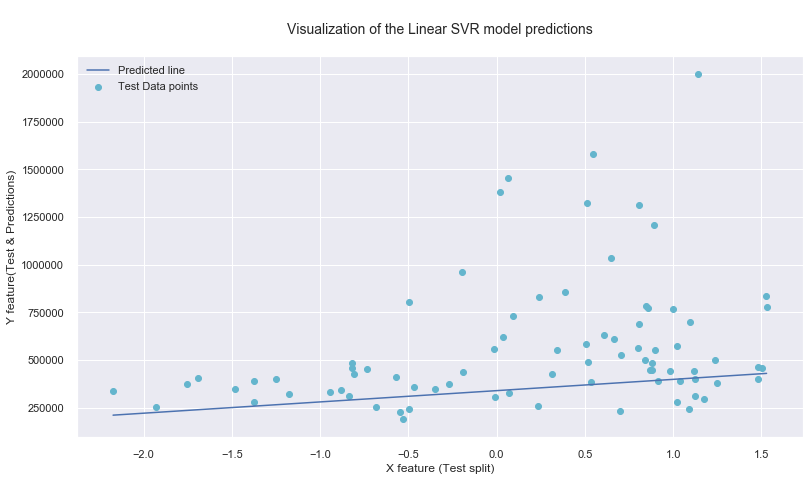

In [593]:
X_b = X_train[:80,14].reshape(-1,1)
y_b = y_train[:80]
svregt = LinearSVR(random_state=0,C=8450)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:80,14].tolist(),'y':y_test[:80].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'b',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='c')
plt.title('\nVisualization of the Linear SVR model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Linear Support Vector Regressor model yields the best results when `C = 8450`which leads to the best R<sup>2</sup> score of `0.616850` 
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  SVM- Kernal RBF (Radial Bias Function) Regressor </font></b>

In [334]:
from sklearn.svm import SVR

In [543]:
np.random.seed(42)
param_grid = {'C': [0.01, 0.1, 1, 10, 1000, 5000],
              'gamma': [0.0001, 0.001, 0.1, 10, 1000]}
svregrbf = GridSearchCV(SVR(kernel='rbf'), param_grid,return_train_score=True, cv=6, n_jobs=-1)
svregrbf.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 1000, 5000],
                         'gamma': [0.0001, 0.001, 0.1, 10, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [556]:
svregrbf.score(X_test, y_test)
#R2 score

0.4479152864018309

In [554]:
print(f'Best parameters: {svregrbf.best_params_}')
print(f'Best cross-validation score: {svregrbf.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 5000, 'gamma': 0.001}
Best cross-validation score: 0.43926358910296265


In [555]:
result4=pd.DataFrame(svregrbf.cv_results_)
result4.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
25,10.989180,0.115535,1.459927,0.014296,5000,0.0001,"{'C': 5000, 'gamma': 0.0001}",0.062241,0.064466,0.060769,...,0.007100,5,0.063137,0.063472,0.063344,0.063683,0.062360,0.062635,0.063105,0.000466
26,10.648946,0.106488,1.479130,0.038936,5000,0.001,"{'C': 5000, 'gamma': 0.001}",0.420370,0.457952,0.431691,...,0.016668,1,0.443019,0.435232,0.439152,0.438136,0.433564,0.436583,0.437614,0.003027
27,10.132794,0.076331,1.450976,0.035232,5000,0.1,"{'C': 5000, 'gamma': 0.1}",0.364950,0.490309,0.381761,...,0.045214,2,0.415316,0.397276,0.411544,0.420146,0.402182,0.403984,0.408408,0.007933
28,11.132965,0.161035,1.494853,0.019685,5000,10,"{'C': 5000, 'gamma': 10}",-0.049967,-0.061850,-0.055107,...,0.008095,8,-0.038080,-0.038968,-0.037546,-0.037570,-0.037561,-0.038505,-0.038038,0.000544
29,7.754318,0.191622,1.061465,0.026745,5000,1000,"{'C': 5000, 'gamma': 1000}",-0.053326,-0.067205,-0.059074,...,0.008182,10,-0.041925,-0.042893,-0.041673,-0.041448,-0.041645,-0.042226,-0.041969,0.000480


In [553]:
y_preds = svregrbf.predict(X_test)
print('\nFor C =',result4['param_C'][svregrbf.best_index_],'\nFor gamma =',result4['param_gamma'][svregrbf.best_index_])
print('\n\t• Cross validation Training score mean: ',result4['mean_train_score'][svregrbf.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svregrbf.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_preds))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_preds)))
print('----------------------------------------------------------------------------')


For C = 5000 
For gamma = 0.001

	• Cross validation Training score mean:  0.4376143183670835

	• Cross validation Testing score mean:  0.43926358910296265

	• R2 Score:  0.44791528640183087

	• Root Mean Squared Error:  275312.1642766682
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the SVM RBF Model 

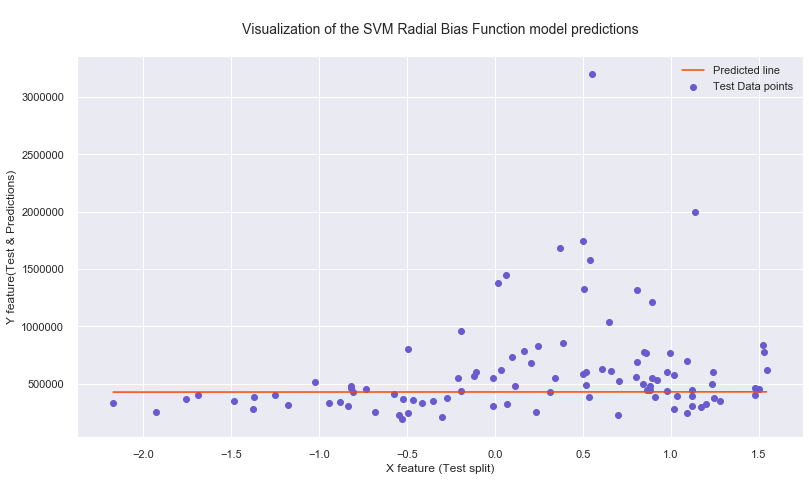

In [594]:
X_b = X_train[:100,14].reshape(-1,1)
y_b = y_train[:100]
svregt = SVR(kernel='rbf',gamma=0.001,C=5000)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:100,14].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'orangered',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='slateblue')
plt.title('\nVisualization of the SVM Radial Bias Function model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the SVM RBF model yields the best results when `C = 5000` and `gamma = 0.001` which leads to the best R<sup>2</sup> score of `0.447915`. It indicates the chosen model does not follow the trend of the data.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  SVM- Kernal (Polynomial) Regressor </font></b>

In [373]:
from sklearn.svm import SVR

In [692]:
np.random.seed(42)
param_grids = {'C': [0.01,1,10,100,1000,5000],
              'degree': [1,3,5]}
svregpoly = GridSearchCV(SVR(kernel='poly'), param_grids ,return_train_score=True, cv=6, n_jobs=-1)
svregpoly.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 1, 10, 100, 1000, 5000],
                         'degree': [1, 3, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [694]:
svregpoly.score(X_test, y_test)
#R2 score

0.6937128127710509

In [701]:
print(f'Best parameters: {svregpoly.best_params_}')
print(f'Best cross-validation score: {svregpoly.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 5000, 'degree': 3}
Best cross-validation score: 0.6530484011719506


In [702]:
result5=pd.DataFrame(svregpoly.cv_results_)
result5.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
13,8.621435,0.061242,0.919385,0.020306,1000,3,"{'C': 1000, 'degree': 3}",0.622388,0.500920,0.475589,...,0.059891,4,0.608059,0.629729,0.607654,0.610571,0.621836,0.617462,0.615885,0.008029
14,14.368712,0.640892,0.953447,0.035078,1000,5,"{'C': 1000, 'degree': 5}",0.179581,-2.355016,-7.910632,...,15.507381,17,0.558533,0.581982,0.558182,0.563139,0.578823,0.568591,0.568208,0.009331
15,7.828920,0.088410,0.903588,0.033247,5000,1,"{'C': 5000, 'degree': 1}",0.608389,0.621442,0.632690,...,0.017073,2,0.634615,0.635548,0.630512,0.633416,0.625032,0.625697,0.630803,0.004150
16,9.418938,0.161377,0.919030,0.018701,5000,3,"{'C': 5000, 'degree': 3}",0.678612,0.582514,0.684802,...,0.043427,1,0.690886,0.705392,0.688634,0.689954,0.697290,0.693293,0.694241,0.005710
17,24.330409,3.130030,0.826085,0.188013,5000,5,"{'C': 5000, 'degree': 5}",-0.969490,-4.706230,-43.049966,...,24.900313,18,0.647131,0.669544,0.643866,0.647342,0.662675,0.651160,0.653620,0.009294


In [706]:
y_prediction = svregpoly.predict(X_test)
print('\nFor C =',result5['param_C'][svregpoly.best_index_],'\nFor degree =',result5['param_degree'][svregpoly.best_index_])
print('\n\t• Cross validation Training score mean: ',result5['mean_train_score'][svregpoly.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svregpoly.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_prediction))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('----------------------------------------------------------------------------')


For C = 5000 
For degree = 3

	• Cross validation Training score mean:  0.6942412277822548

	• Cross validation Testing score mean:  0.6530484011719506

	• R2 Score:  0.6937128127710509

	• Root Mean Squared Error:  205062.83353155424
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the SVM Polynomial Model 

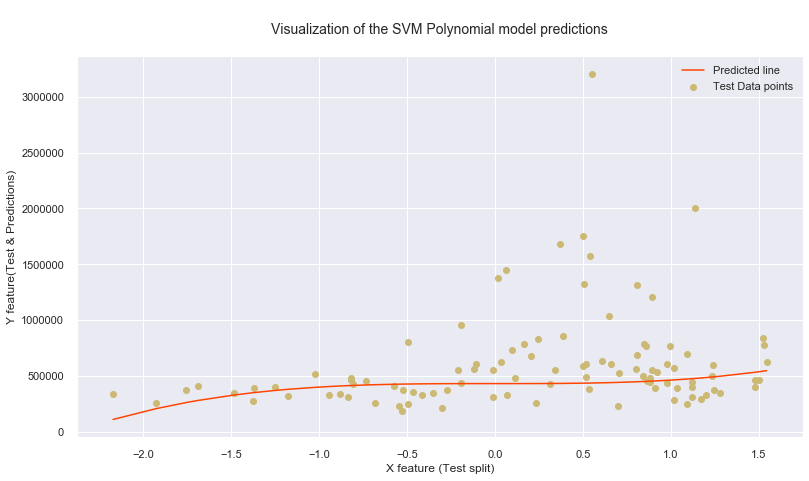

In [700]:
X_b = X_train[:100,14].reshape(-1,1)
y_b = y_train[:100]
svregt = SVR(kernel='poly',degree=3,C=5000)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:100,14].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'orangered',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='y')
plt.title('\nVisualization of the SVM Polynomial model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the SVM Polynomial model yields the best results when `C = 5000` and `degree = 3` which leads to the best R<sup>2</sup> score of `0.693712`. It indicates the chosen model does not follow the trend of the data.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  SVM- Kernal (Linear) Regressor </font></b>

In [409]:
from sklearn.svm import SVR

In [535]:
np.random.seed(42)
param_c = {'C': [0.01, 0.1, 1, 10, 100, 1000, 5000]}
svreglinear = GridSearchCV(SVR(kernel='linear'), param_c ,return_train_score=True, cv=6, n_jobs=-1)
svreglinear.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [537]:
svreglinear.score(X_test, y_test)
#R2 score

0.6177104104597748

In [538]:
print(f'Best parameters: {svreglinear.best_params_}')
print(f'Best cross-validation score: {svreglinear.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 5000}
Best cross-validation score: 0.6397520870327963


In [539]:
result6=pd.DataFrame(svreglinear.cv_results_)
result6.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
2,11.686647,1.601248,1.304627,0.270372,1,{'C': 1},0.063201,0.065105,0.061797,0.061402,...,0.007149,5,0.063992,0.064312,0.064269,0.064504,0.063303,0.063524,0.063984,0.000435
3,8.797368,0.305336,1.098569,0.110905,10,{'C': 10},0.438452,0.467698,0.449423,0.434496,...,0.016131,4,0.456945,0.452570,0.454093,0.455194,0.450830,0.451536,0.453528,0.002119
4,9.196374,0.754628,0.924155,0.062354,100,{'C': 100},0.592262,0.612865,0.616720,0.599676,...,0.016480,3,0.618667,0.617940,0.615251,0.616947,0.609119,0.609013,0.614490,0.003975
5,9.059948,1.148199,0.876367,0.043029,1000,{'C': 1000},0.616341,0.623072,0.642846,0.624919,...,0.018173,2,0.641912,0.642880,0.638123,0.640620,0.633347,0.633420,0.638383,0.003824
6,8.611433,2.204699,0.728749,0.165553,5000,{'C': 5000},0.619318,0.619867,0.645034,0.629353,...,0.018566,1,0.645634,0.647702,0.640208,0.644578,0.636108,0.634909,0.641523,0.004817


In [540]:
y_predictions = svreglinear.predict(X_test)
print('\nFor C =',result6['param_C'][svreglinear.best_index_])
print('\n\t• Cross validation Training score mean: ',result6['mean_train_score'][svreglinear.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svreglinear.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_predictions))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('----------------------------------------------------------------------------')


For C = 5000

	• Cross validation Training score mean:  0.6415231883936268

	• Cross validation Testing score mean:  0.6397520870327963

	• R2 Score:  0.6177104104597748

	• Root Mean Squared Error:  229096.66919967582
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the SVM Linear Model 

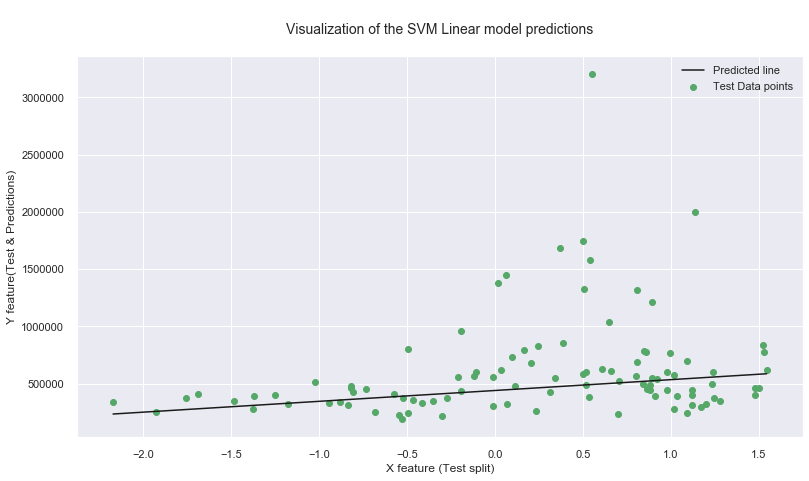

In [595]:
X_b = X_train[:100,14].reshape(-1,1)
y_b = y_train[:100]
svregt = SVR(kernel='linear',C=5000)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:100,14].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'k',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='g')
plt.title('\nVisualization of the SVM Linear model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the SVM RBF model yields the best results when `C = 5000` which leads to the best R<sup>2</sup> score of `0.617710`.
<div>

<div class="alert alert-info" role="alert">
<b><font size="4">  Model Selection: </font></b>
    
Compare all the above models' performance    
</div>

In [7]:
dict={'R2 Score':[0.778513,0.669379,0.669072,0.669352,0.812826,0.616850,0.447915,0.693712,0.617710],
      'RMSE':[174379,213052,213151,213061,160304,229354,275312,205062,229096],
      'Optimal Parameter':["n-neighbors = 7","None", "alpha = 120","alpha = 80", "degree = 2","C = 8450","C = 5000, gamma = 0.001","C = 5000, degree = 3","C = 5000"]}
model_results= pd.DataFrame(dict,index=['KNN Regressor','Simple Linear Regression','Ridge Regression','Lasso Regression', 
                                        'Polynomial Regression', 'Linear Support Vector Regressor', 'SVM- Kernal (RBF) Regressor', 
                                        'SVM- Kernal (Poly) Regressor','SVM- Kernal (Linear) Regressor'])
print('\n\n Metrics Summary of all Models(sorted based on R2 score):')
display(model_results.sort_values(by=['R2 Score'],ascending=False))



 Metrics Summary of all Models(sorted based on R2 score):


,R2 Score,RMSE,Optimal Parameter
Polynomial Regression,0.812826,160304,degree = 2
KNN Regressor,0.778513,174379,n-neighbors = 7
SVM- Kernal (Poly) Regressor,0.693712,205062,"C = 5000, degree = 3"
Simple Linear Regression,0.669379,213052,None
Lasso Regression,0.669352,213061,alpha = 80
Ridge Regression,0.669072,213151,alpha = 120
SVM- Kernal (Linear) Regressor,0.617710,229096,C = 5000
Linear Support Vector Regressor,0.616850,229354,C = 8450
SVM- Kernal (RBF) Regressor,0.447915,275312,"C = 5000, gamma = 0.001"


<div class="alert alert-block alert-warning">
<b><font size="4"> Based on the metrics, polynomial regression is the best model among all.</font></b>
    
Below is the final results that we use to predict the target values for the test set:
</div>

In [704]:
np.random.seed(42)
poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)  
X_test_poly = poly.transform(X_test)
print('For degree = 2')
lnreg = LinearRegression()
lnreg.fit(X_train_poly, y_train)

y_pred = lnreg.predict(X_test_poly)

print(f'\n\tTraining score: {lnreg.score(X_train_poly, y_train):0.6f}')
print(f'\n\tTesting score: {lnreg.score(X_test_poly, y_test):0.6f}')
print(f'\n\tPolynomial Linear Regression Metrics:\n\n\t• Mean Squared Error: {(mean_squared_error(y_test, y_pred)):0.6f} \n\n\t• Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):0.6f} \n\n\t• R2 Score: {r2_score(y_test,y_pred):0.6f}')

For degree = 2

	Training score: 0.821133

	Testing score: 0.812826

	Polynomial Linear Regression Metrics:

	• Mean Squared Error: 25697467885.739185 

	• Root Mean Squared Error: 160304.297777 

	• R2 Score: 0.812826


In [9]:
model_results.to_csv("project1_result_table.csv")